In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt', force_remount=True)
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/Librerias', nb_path)
#sys.path.insert(0, nb_path)  # or append(nb_path)
sys.path.append(nb_path)  # or append(nb_path)


Mounted at /content/mnt


In [6]:

import warnings
warnings.filterwarnings('ignore')

# Predicción de Series Temporales

## Bibliografía
<div class="hr2"></div>
- Hyndman, R. J., A. B. Koehler, J. K. Ord and R. D. Snyder (2008).
Forecasting with exponential smoothing: the state space approach.
Berlin: Springer-Verlag.

- Hydman, Rob y George Athanasopoulos (2015). “Forecasting: principles and
practice”. Otexts.
[*https://www.otexts.org/fpp*](https://www.otexts.org/fpp)

- Gardner Jr, E. S. (1985). Exponential smoothing: The state of the art.
Journal of Forecasting 4(1), 1–28.

- Gardner Jr, E. S. (2006). Exponential smoothing: The state of the
art—Part II. International Journal of Forecasting 22(4), 637–666.



<div class="hr2"></div>

Una **serie temporal** es una sucesión de observaciones de una variable
tomadas en varios instantes de tiempo:

-   Interesa estudiar los cambios en esa variable con respeto al tiempo.

-   Predecir sus valores futuros.

**Problema:**

Estas observaciones provienen de una distribución que puede ser
diferente en cada instante del tiempo.







**Estacionariedad:**

-   Una serie **es estacionaria** si la media y la variabilidad se
    mantienen constantes a lo largo del tiempo.

-   Una serie **es no estacionaria** si la media y/o la variabilidad
    cambian a lo largo del tiempo.:

    -   Series no estacionarias pueden mostrar cambios de varianza.

    -   Series no estacionarias pueden mostrar una tendencia, es decir
        que la media crece o baja a lo largo del tiempo.

    -   Además, pueden presentar efectos estacionales, es decir que el
        comportamiento de la serie es parecido en ciertos tiempos
        periódicos en el tiempo.





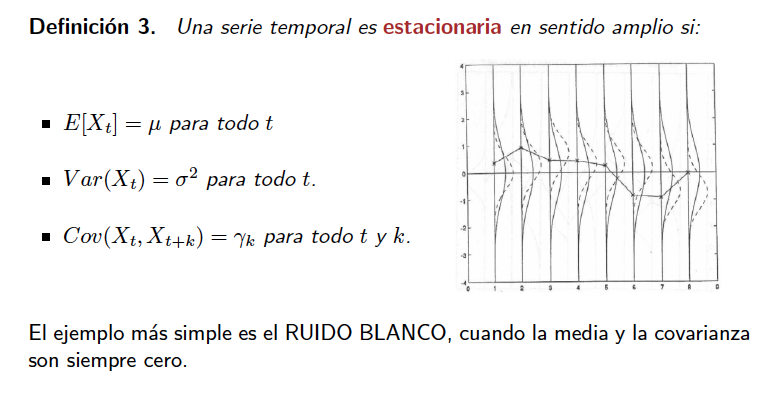


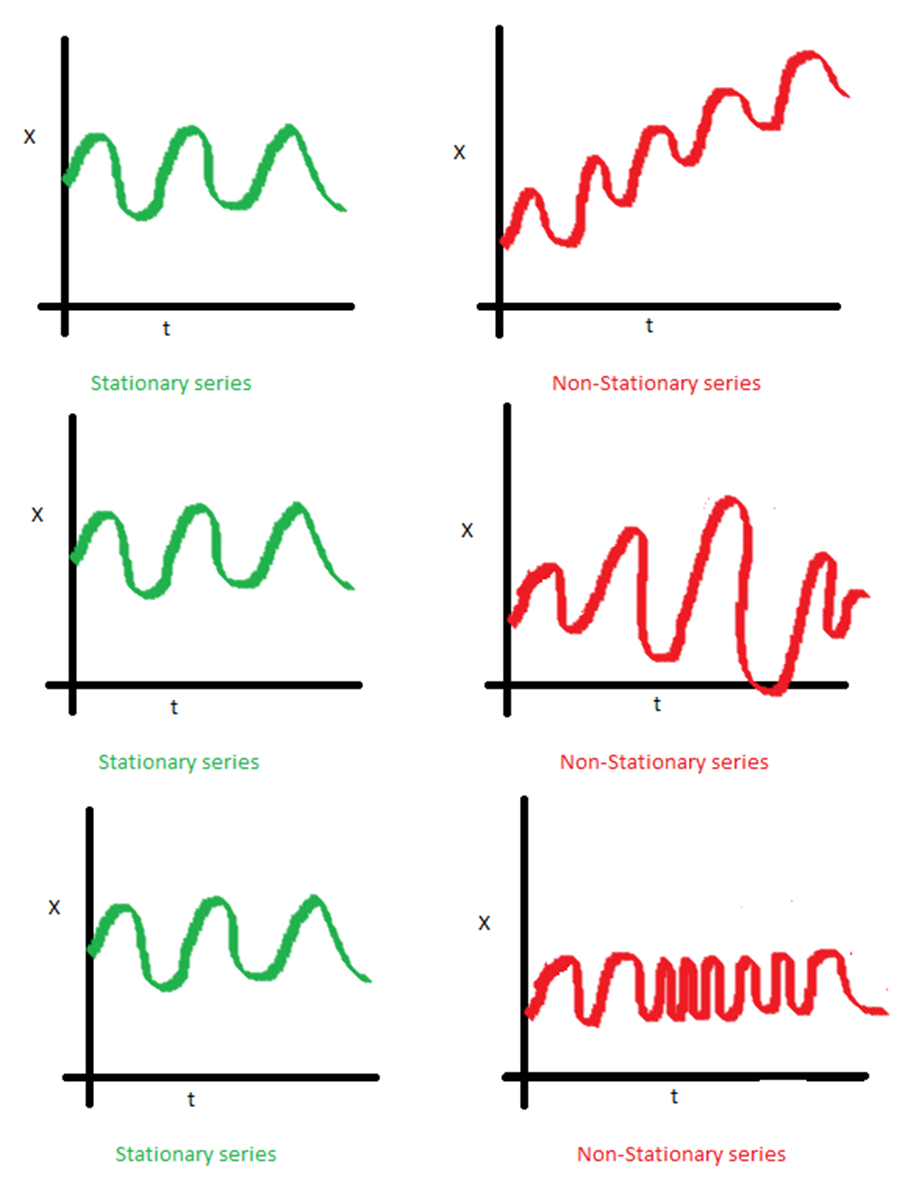

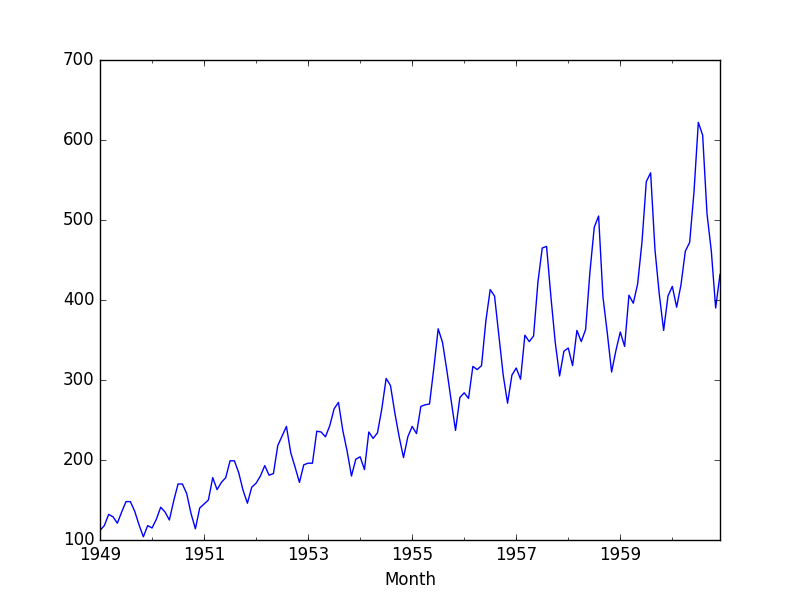



# Series Temporales
<div class="hr2"></div>

**¿Por qué es bueno que las series sean estacionarias?**

-   Con series estacionarias podemos obtener predicciones fácilmente.

-   Como la media es constante, podemos estimarla con todos los datos, y
    utilizar este valor para predecir una nueva observación.

-   También se pueden obtener intervalos de predicción (confianza) para
    las predicciones asumiendo que $X_t$ sigue una distribución conocida,
    por ejemplo, normal.

## Series temporales: Componentes
<div class="hr2"></div>

### Componentes de una serie temporal


- En muchos casos, se supone que la serie temporal es la suma de varias
componentes:

$$Y_t=T_t+S_t+E_t$$

**Valor observado = Tendencia + Estacionalidad + Irregular**

- **Tendencia:** comportamiento o movimiento suave de la serie a largo plazo. Puede ser creciente o decreciente y no tiene por que ser lineal. A veces incluye el ciclo (tendencia_ciclo).



- **Estacionalidad:** movimientos de oscilación dentro del año (trimestral, mensual, diario). La estacionalidad siempre es de un periodo fijo y conocido. No confundir con los ciclos que no tienen duración fija y como mínimo son de dos años.

- **Irregular:** variaciones aleatorias alrededor de los componentes anteriores.



## Componentes

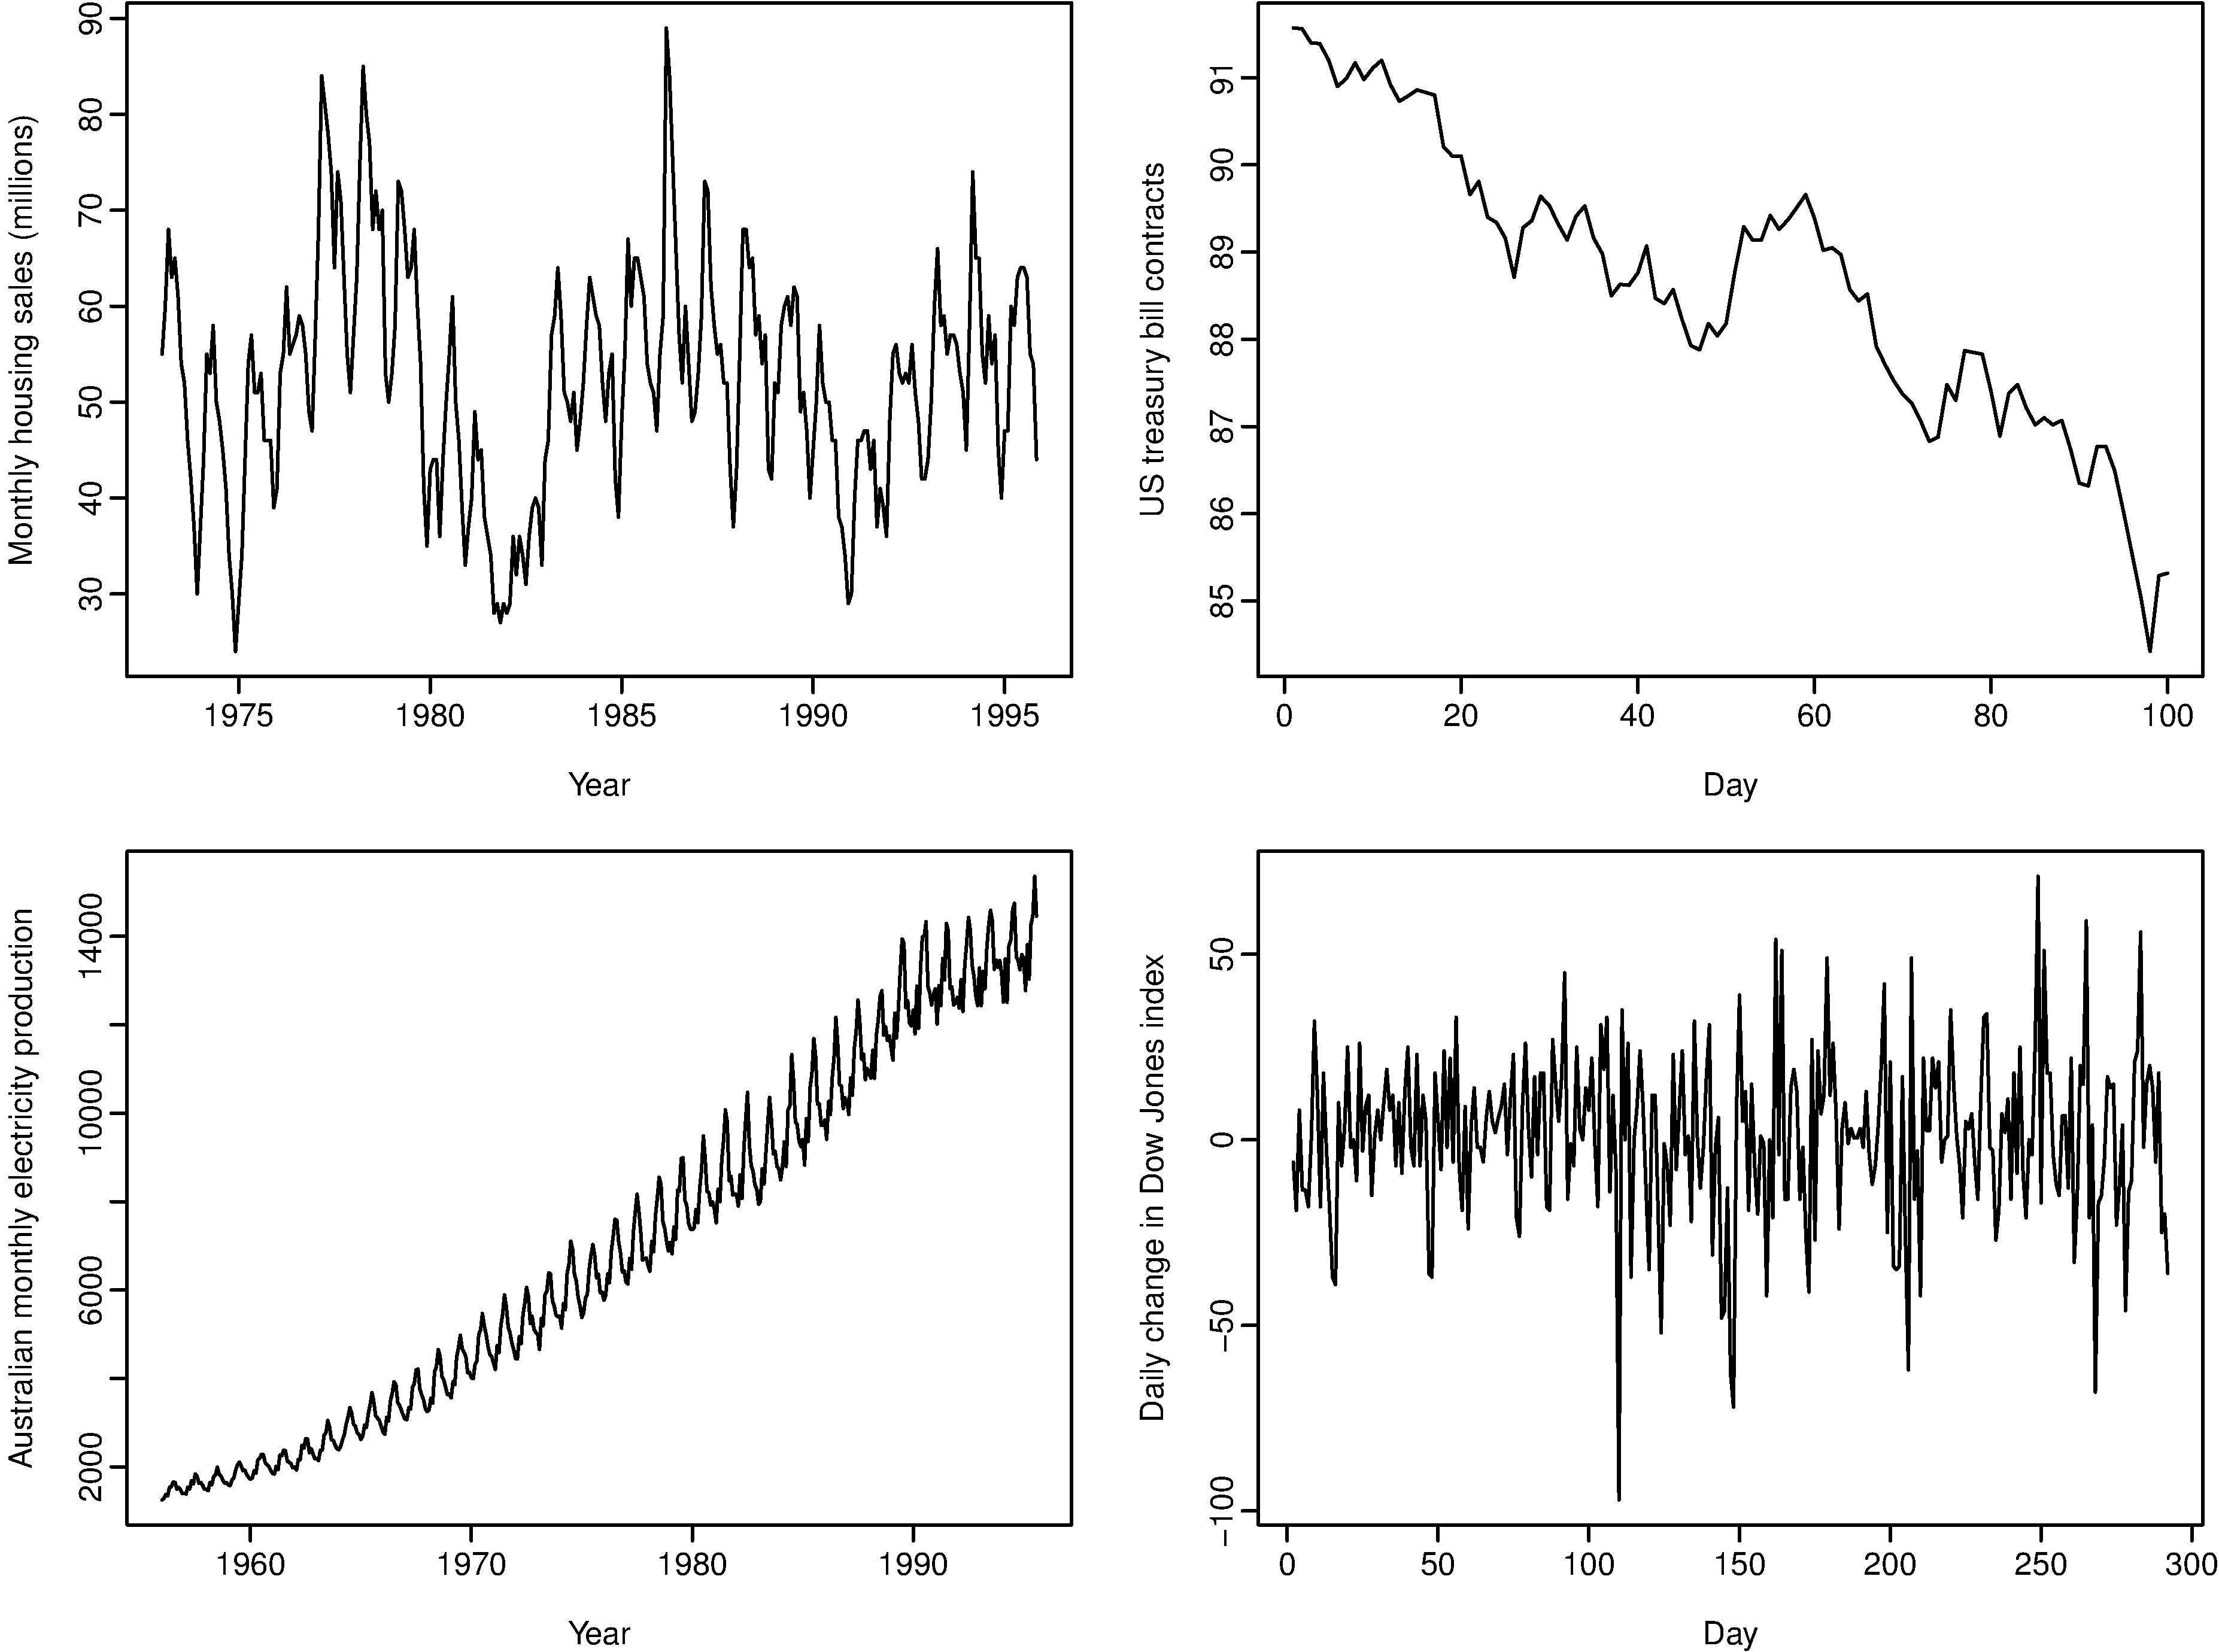




<div class="hr2"></div>

-  Las ventas de casas muestra un componente estacional y uno cíclico.
    No parece que exista tendencia.

-  Los t-bill no son estacionales pero tiene tendencia decreciente.

- La producción de electricidad tiene una fuerte tendencia y una
    fuerte estacionalidad.

- Los rendimientos del Dow Jones no tiene ni tendencia ni componentes
    estacional.


**Modelo Multiplicativo**
<div class="hr2"></div>

- El modelo también se puede expresar en forma multiplicativa cuando las
variaciones alrededor de la tendencia son proporcionales al
nivel de la serie temporal.

- Para ello se debe realizar una transformación logarítmica para que la
variación de la serie sea estable:
$$Y_t=T_t \times S_t \times E_t$$
$$lnY_t=lnT_t+lnS_t+lnE_t$$

# Ejemplo Descomposición:

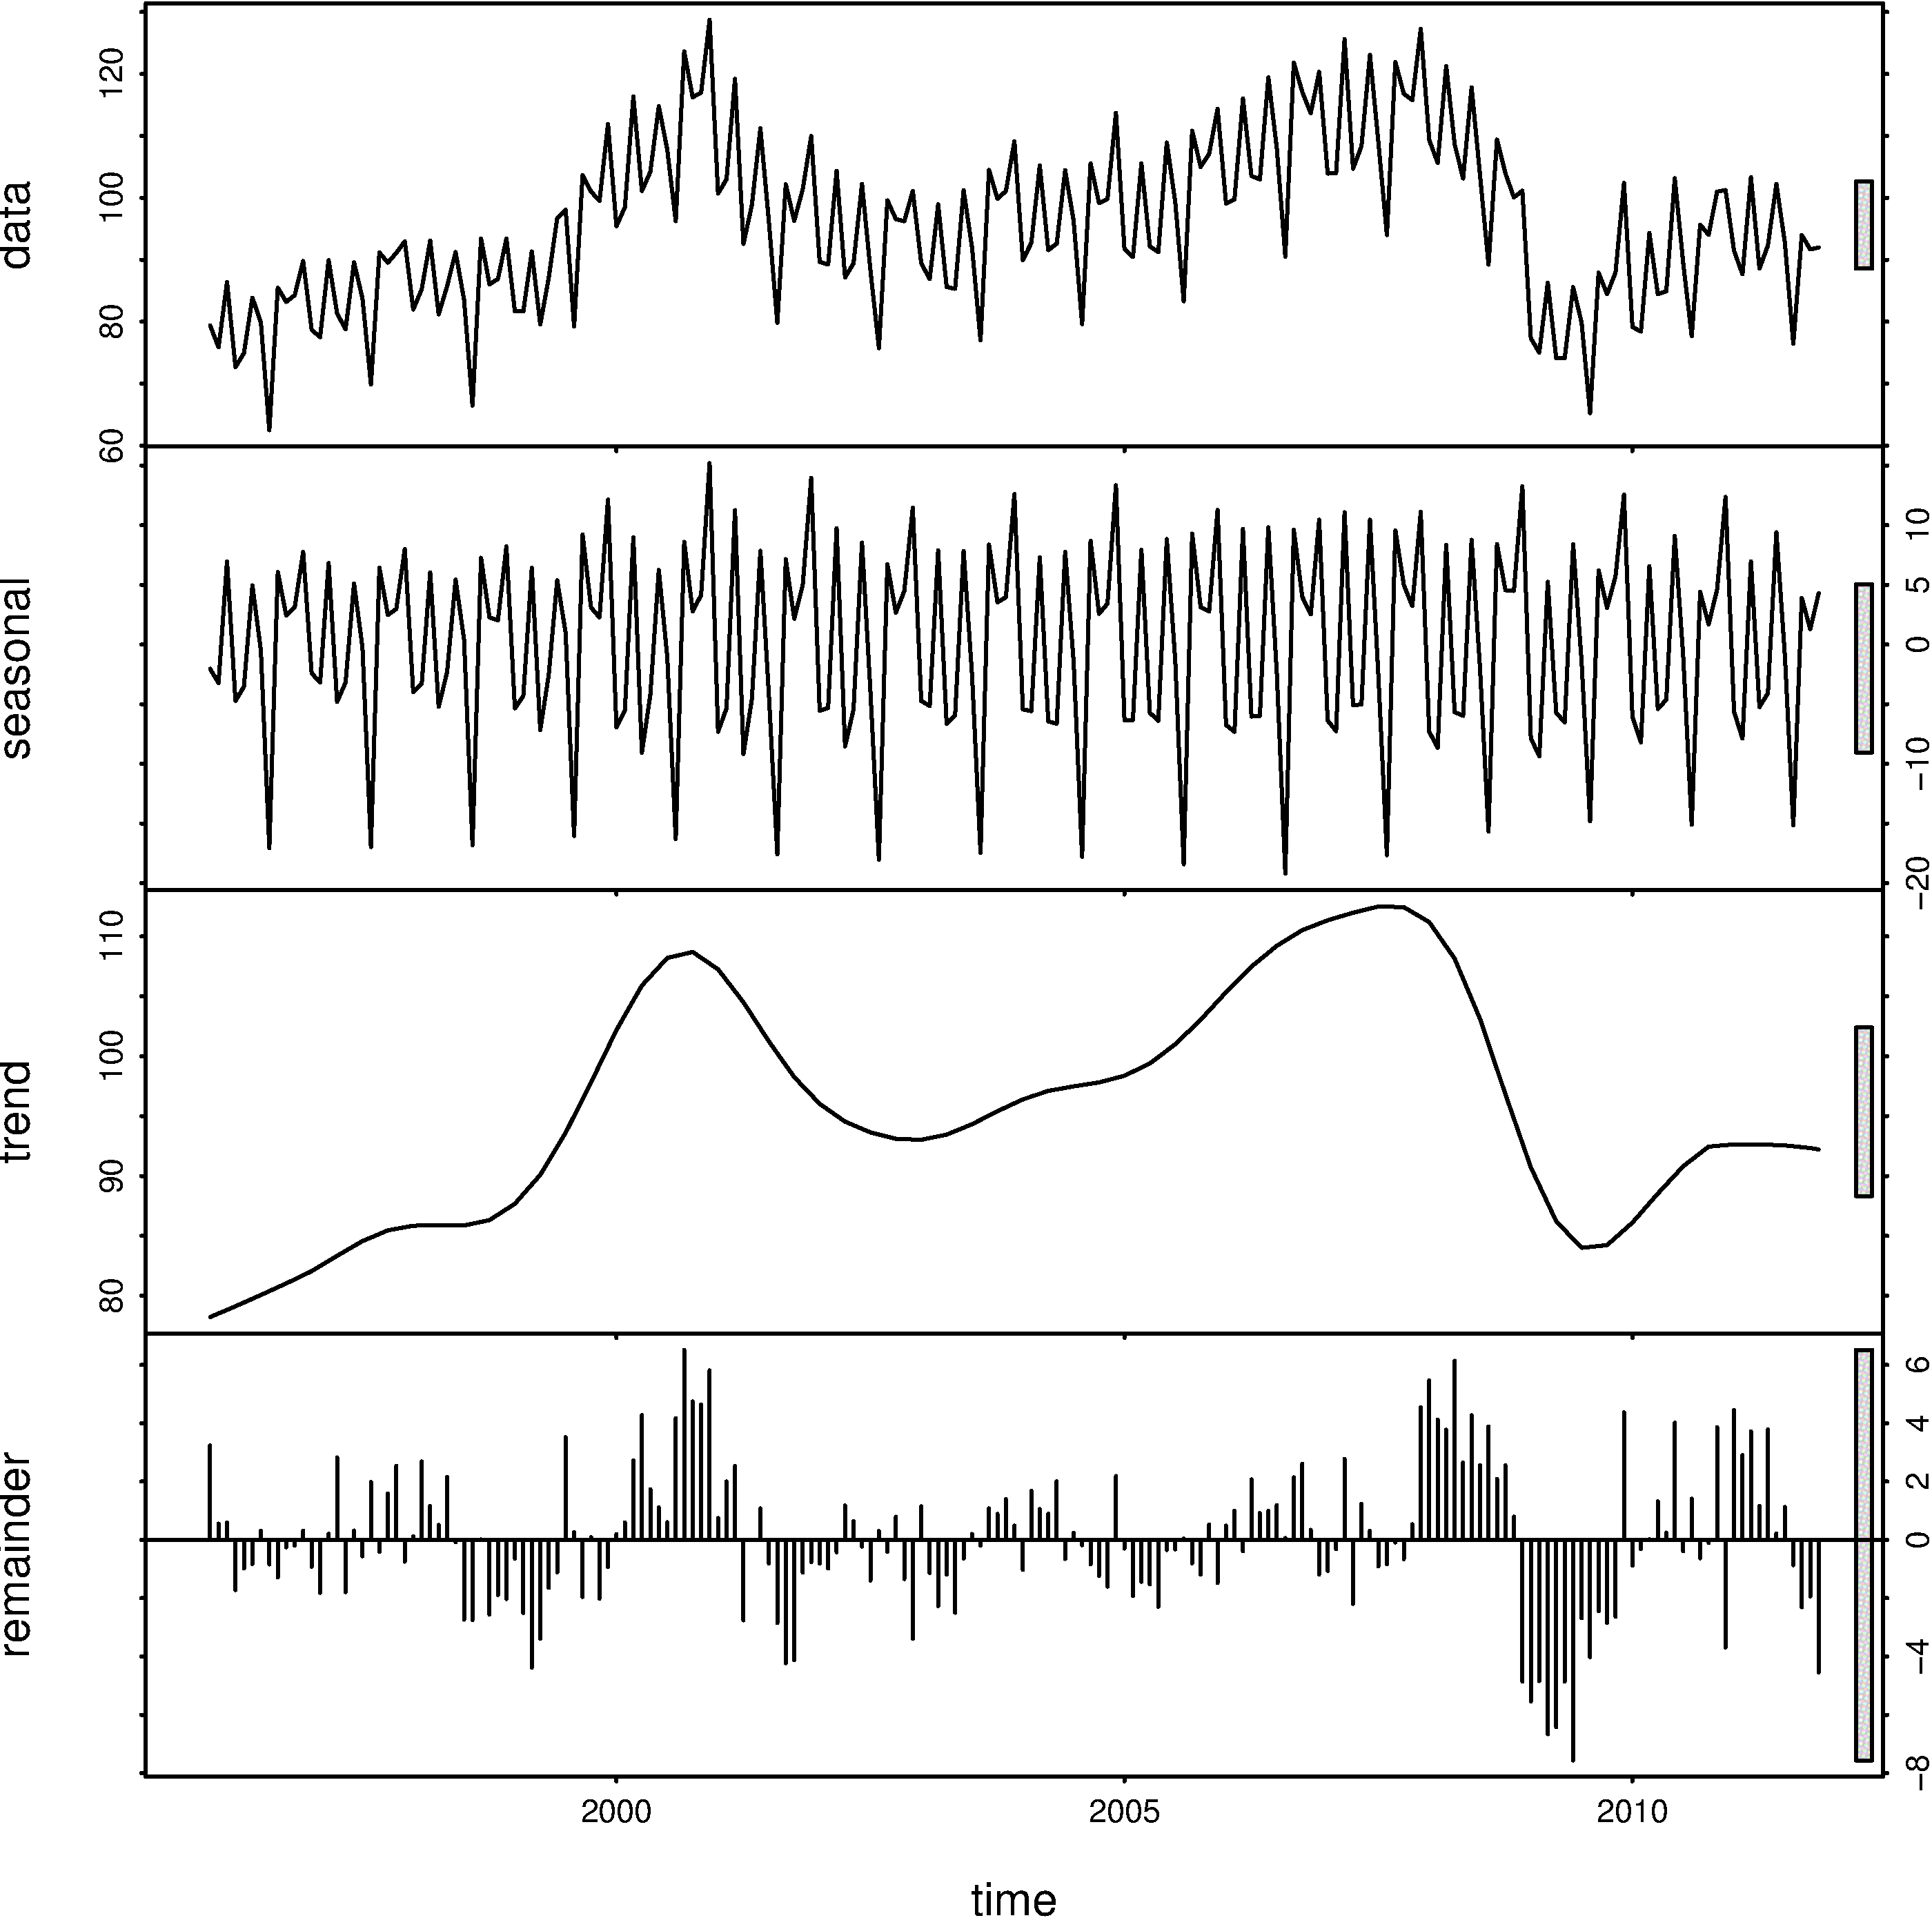


# Suavizado Exponencial


### Modelos de Suavizado Exponencial


-   Se emplean fundamentalmente para predecir nuevos valores de la
    serie.

-   Se basan en modelos paramétricos deterministas que se ajustan a la
    evolución de la serie.

-   Las observaciones más recientes tienen más peso en la predicción que
    las más alejadas.

-   Se resuelven por métodos recursivos.


# Modelos ETS 
<div class="hr2"></div>
$$Y_t=T_t+S_t+E_t \ \ \ \rightarrow \ \ \ \text{Modelo Aditivo}$$
$$Y_t=T_t \times S_t \times E_t \ \ \ \rightarrow \ \ \ \text{Modelo Multiplicativo}$$


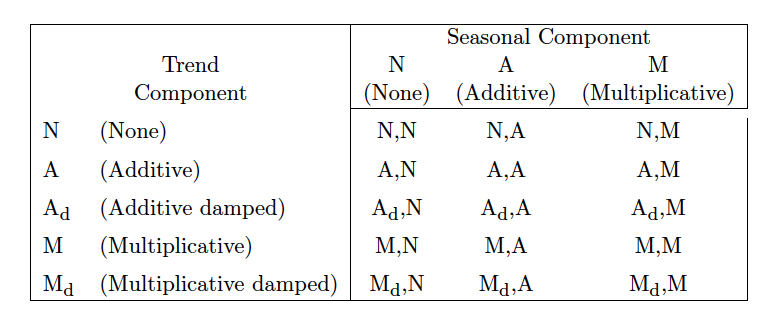



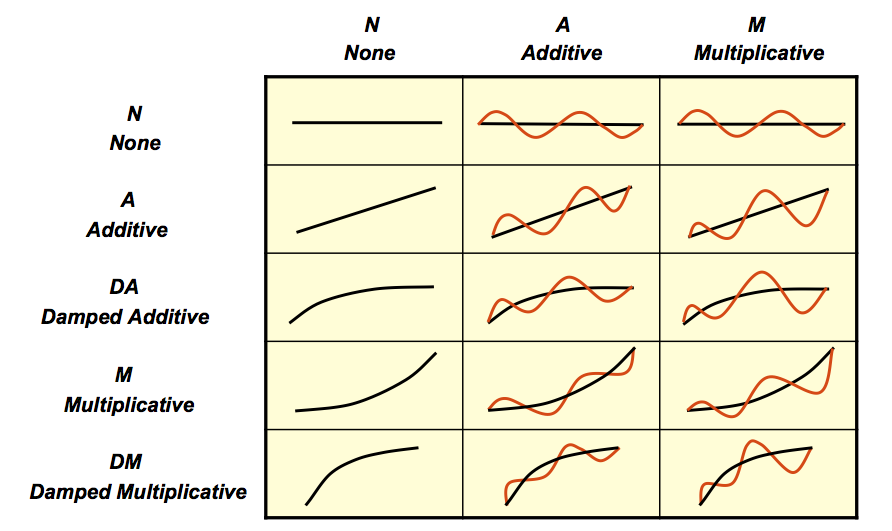



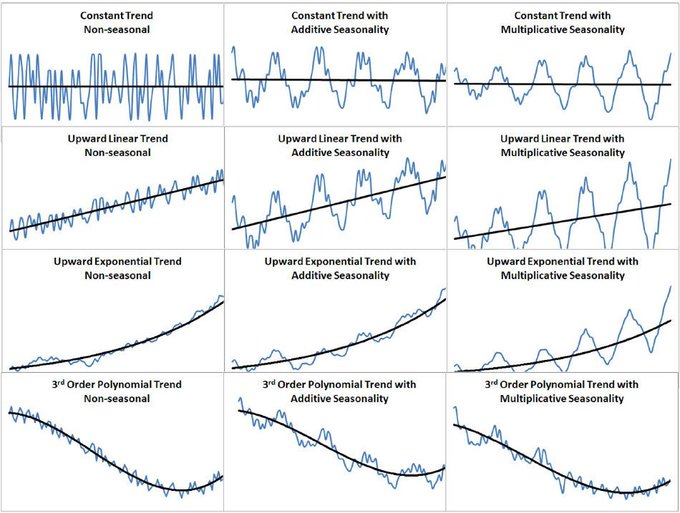



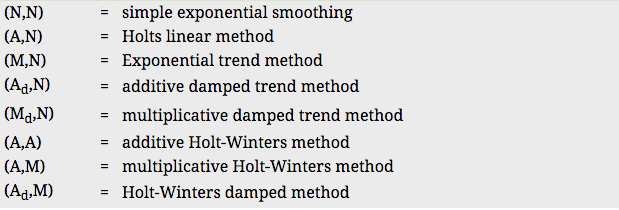


# Selección de Modelos
<div class="hr1"></div>

**¿Cómo seleccionar un modelo de entre varios candidatos?**


- Utilizando los **Criterios de Información (IC)**:

    - Cuantifican la información residual. Cuanto más información tienen los residuos del modelo mayor es el IC, por lo tanto peor es el modelo.

    - Suponemos que tenemos k modelos alternativos, $M_1, M_2, \cdots,M_j,\cdots,M_k$, Se elige el $j$ que **minimice**:
     
     $$IC(j)=ln\hat \sigma_j^2+\frac{C(T)}{T}$$

    donde $\hat \sigma_j^2$ es la varianza residual del modelo, $T$ es el tamaño muestral y $C(T)$ es el término de penalización (penalty).

    - AIC (Akaike Information Criterium): $C(T)=2$

    - BIC (Bayesian Information Criterium): $C(T)=lnT$

    - HQ (Hannan-Quin Information Criterium): $C(T)=2\cdot ln(lnT)$



# Precisión de las Predicciones
<div class="hr1"></div>

### Precisión de las Predicciones


- Error de predicción:

$$e_t=y_t-\hat y_t \ \ \ t=1 \cdots h$$


- Medidas Absolutas (dependen de las unidades de medida):  
    - Mean absolute error (MAE) = $\sum \frac{|e_t|}{h}$  
    - Mean squared error (MSE) = $\sum \frac{e_t^2}{h}$  
    - Root mean squared error (RMSE) = $\sqrt {MSE}$  


# Precisión de las Predicciones

- Medidas Relativas (expresadas en %, y no dependen de las unidades de medida)

    - Porcentaje de error: $p_t=100\frac{e_t}{y_t}$

    - Mean absolute percentage error (MAPE) = $\sum \frac{|p_t|}{h}$


# Precisión de las Predicciones

- Medidas Escaladas (se escalan los errores con respecto al modelo naïve) 

    - Modelo naïve: $\hat y_t=y_{t-1}$  

    - Error modelo naïve: $n_t=y_t-y_{t-1}$  

    - Scaled error: $q_t=\frac{e_t}{\sum \frac{|n_t|}{h}}$  

    - Mean absolute scaled error (MASE): $\sum \frac{|q_t|}{h}$




# CP 01: Predicción Ingresos Coca-Cola (KO)
<div class="hr1"></div>


# Introducción

<div class="exercise">

- El objetivo es predecir las ventas de Coca-Cola.

- Se realizan diferentes predicciones de las ventas de Coca-Cola.

- Se tienen datos trimestrales desde 1991-1T hasta 2021-2T. 

- Se dejan fuera de la estimación los ocho últimos trimestres para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>


In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [8]:
# Read Data
ko_df = pd.read_csv('/content/mnt/My Drive/Colab Notebooks/Series Temporales/S01/ko.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()



,Ingresos
Fecha,
2021-06-03,10129
2021-03-03,9020
2020-12-31,8611
2020-09-26,8652
2020-06-27,7150


<div class="redcuadro">

Convertimos los datos en trimestrales

</div>

In [9]:
ko_ts=ko_df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
ko_ts.tail()

,Ingresos
Fecha,
2020-06-30,7150
2020-09-30,8652
2020-12-31,8611
2021-03-31,9020
2021-06-30,10129


# Solución

## Graficar los Ingresos
<div class="hr2"> </div>
- Tendencia
- Componente Estacional
- Varianza no constante

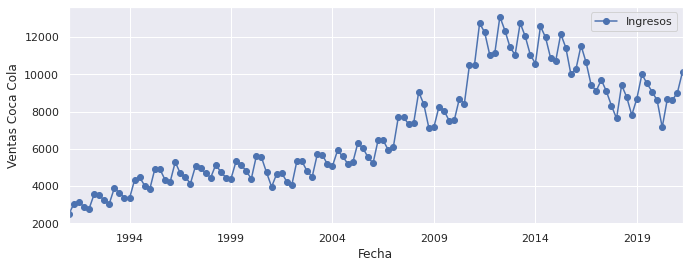

In [10]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');


<div class="redcuadro">

Analizamos la estacinalidad

</div>

- Componente estacional
- Las Ventas dependen del trimestre
- Más ventas en el 2T y en el 3T
- El Componente estacional no es estacionario

In [11]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

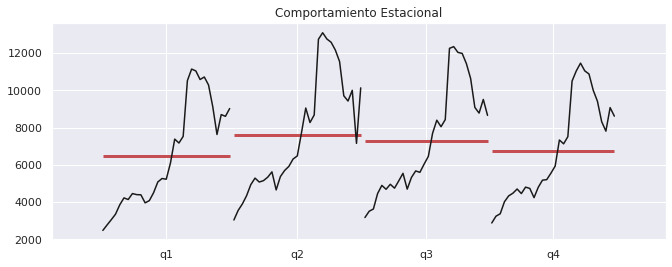

In [12]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ko_ts['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

# Modelos de Suavizado Exponencial

<div class="redcuadro">

Vamos a separar la muestra en la parte de estiamción (Training) y la parte de predicción/Verificación (Testing). Quitamos 8 trimestres. <br><br>

Vamos a predecir 4 periodos (un año) (h=4)<br><br>

</div>

In [13]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split


In [14]:
 ko_ts['Ingresos'].astype('float64').to_period('Q')

Fecha
1991Q1     2480.0
1991Q2     3039.0
1991Q3     3172.0
1991Q4     2879.0
1992Q1     2772.0
           ...   
2020Q2     7150.0
2020Q3     8652.0
2020Q4     8611.0
2021Q1     9020.0
2021Q2    10129.0
Freq: Q-DEC, Name: Ingresos, Length: 122, dtype: float64

114 8


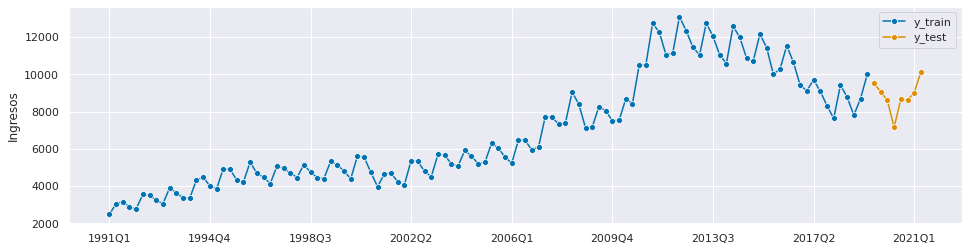

In [51]:

y_train, y_test = temporal_train_test_split(y = ko_ts['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

<div class="redcuadro">

Se observa la necesidad de incluir componente estacional. <br><br>

</div>

In [16]:
from sktime.forecasting.ets import AutoETS

In [52]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 17)

# step 3: specifying the forecasting algorithm
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)


In [53]:
ko_auto_model.fit(y_train)



AutoETS(auto=True, n_jobs=-1, sp=4)

In [54]:
print(ko_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  114
Model:                       ETS(MAM)   Log Likelihood                -828.866
Date:                Sun, 25 Sep 2022   AIC                           1677.731
Time:                        11:46:31   BIC                           1705.093
Sample:                    03-31-1991   HQIC                          1688.836
                         - 06-30-2019   Scale                            0.003
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.121      8.246      0.000       0.762       1.238
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [55]:

# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2019Q3     9591.389872
2019Q4     8853.969701
2020Q1     8594.952101
2020Q2    10346.028127
2020Q3     9923.333013
2020Q4     9157.763414
2021Q1     8887.350349
2021Q2    10695.029335
2021Q3    10255.276153
2021Q4     9461.557128
2022Q1     9179.748597
2022Q2    11044.030543
2022Q3    10587.219293
2022Q4     9765.350841
2023Q1     9472.146845
2023Q2    11393.031750
Freq: Q-DEC, dtype: float64


In [56]:
ko_pred_ints = ko_auto_model.predict_interval(fh, coverage=0.9)
ko_pred_ints

Coverage              
                0.9              
              lower         upper
2019Q3  8705.280749  10436.243032
2019Q4  7697.298211   9946.818797
2020Q1  7247.372905   9958.127255
2020Q2  8510.784281  12288.077361
2020Q3  8071.813201  12093.502643
2020Q4  7283.716351  11190.941105
2021Q1  6904.223998  11125.933896
2021Q2  8292.387636  13555.588992
2021Q3  7735.655883  13124.229589
2021Q4  7041.407272  12265.083426
2022Q1  6739.015208  12033.671137
2022Q2  8010.033674  14609.324064
2022Q3  7597.340071  14415.696275
2022Q4  6897.289484  13241.737406
2023Q1  6511.050275  13029.030958
2023Q2  7895.518157  15941.590043

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e711fd410>)

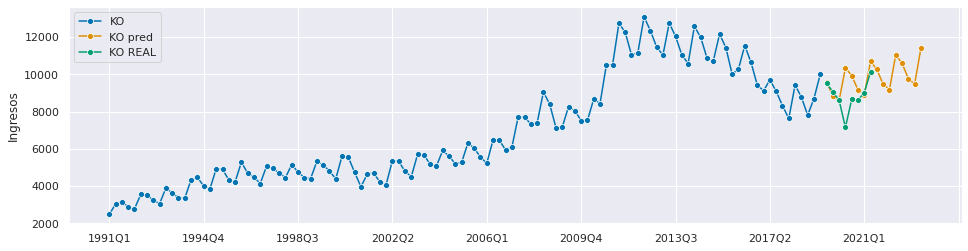

In [21]:

# optional: plotting predictions and past data
plot_series(y_train, ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

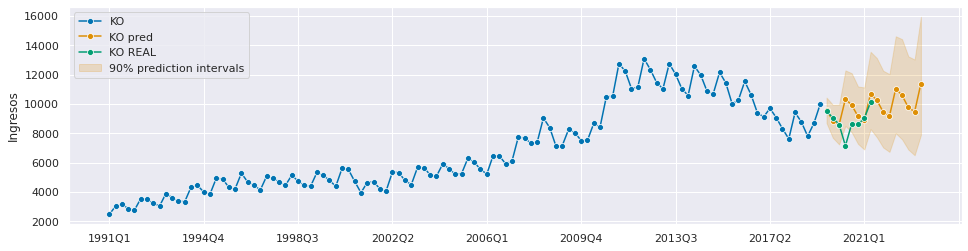

In [61]:
fig, ax = plot_series(y_train, ko_pred, y_test, labels=["KO", "KO pred", "KO REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ko_pred_ints[('Coverage', 0.9, 'lower')],
    ko_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e708d4290>)

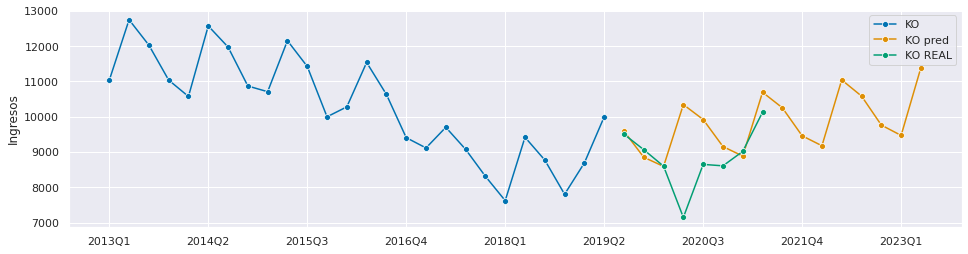

In [22]:
plot_series(y_train["2013":], ko_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

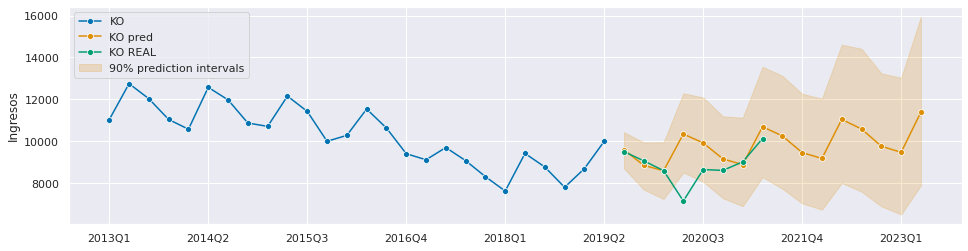

In [62]:
fig, ax = plot_series(y_train["2013":], ko_pred, y_test, labels=["KO", "KO pred", "KO REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    ko_pred_ints[('Coverage', 0.9, 'lower')],
    ko_pred_ints[('Coverage', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left');

<div class="redcuadro">

Comprobemos la precisión de las predicciones <br><br>

</div>

In [32]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, ko_pred[0:8])

0.0951505761366288

In [33]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, ko_pred[0:8])

1565098.2481350685

In [34]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ko_pred[0:8])

1251.038867555708

<div class="redcuadro">

Prediccion para final de año 2021 y 2022 <br><br>

</div>

In [35]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

# step 3: specifying the forecasting algorithm
ko_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

y = ko_ts['Ingresos'].astype('float64').to_period('Q')

ko_auto_model.fit(y)

print(ko_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  122
Model:                       ETS(MAM)   Log Likelihood                -905.927
Date:                Sun, 25 Sep 2022   AIC                           1831.853
Time:                        11:42:36   BIC                           1859.893
Sample:                    03-31-1991   HQIC                          1843.242
                         - 06-30-2021   Scale                            0.004
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8438      0.087      9.652      0.000       0.672       1.015
smoothing_trend     8.438e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

In [36]:
# step 5: querying predictions
ko_pred = ko_auto_model.predict(fh)
print(ko_pred)

2021Q3    10282.769738
2021Q4     9506.523609
2022Q1     9401.106815
2022Q2    10361.900677
2022Q3    10527.174373
2022Q4     9731.143430
Freq: Q-DEC, dtype: float64


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6de44c50>)

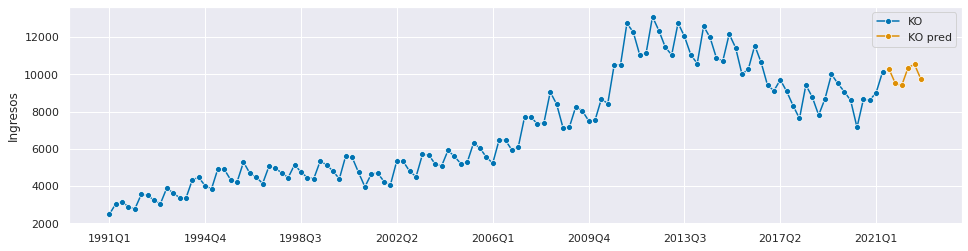

In [37]:
plot_series(y, ko_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual<br><br>

</div>

In [38]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=4)
forecaster.fit(y)


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='additive')

In [39]:

y_pred = forecaster.predict(fh)
y_pred

2021Q3    10223.765652
2021Q4     9456.334854
2022Q1     9373.310362
2022Q2    10430.163683
2022Q3    10535.227084
2022Q4     9742.239445
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [40]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  122
Model:             ExponentialSmoothing   SSE                       29538439.827
Optimized:                         True   AIC                           1528.456
Trend:                         Additive   BIC                           1550.888
Seasonal:                Multiplicative   AICC                          1530.438
Seasonal Periods:                     4   Date:                 Sun, 25 Sep 2022
Box-Cox:                          False   Time:                         11:43:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

In [41]:
forecaster.get_fitted_params()

{'initial_level': 2902.6083250886268,
 'initial_slope': None,
 'initial_seasons': array([0.91390226, 1.10635106, 1.07950563, 0.99709896]),
 'aic': 1528.4562007472675,
 'bic': 1550.8883691051335,
 'aicc': 1530.4381827292495}

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6dee1550>)

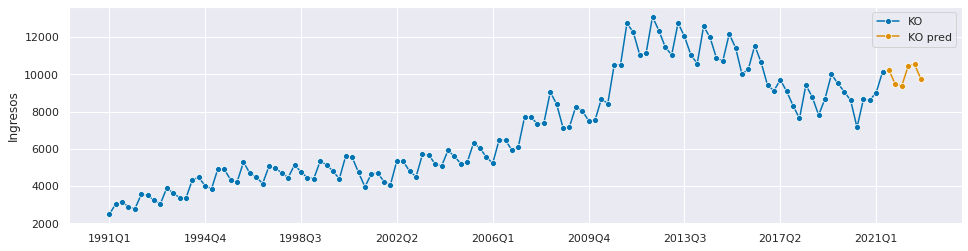

In [42]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional<br><br>

</div>

In [43]:
forecaster = ExponentialSmoothing(trend='additive',seasonal=None, sp=4)
forecaster.fit(y)

ExponentialSmoothing(sp=4, trend='additive')

In [44]:
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e708592d0>)

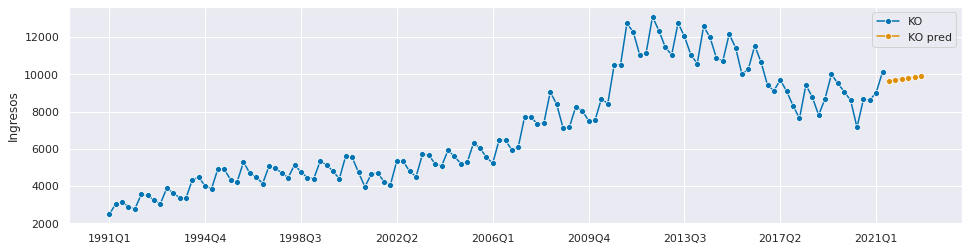

In [45]:
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y tendencia multiplicativa<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6de0e090>)

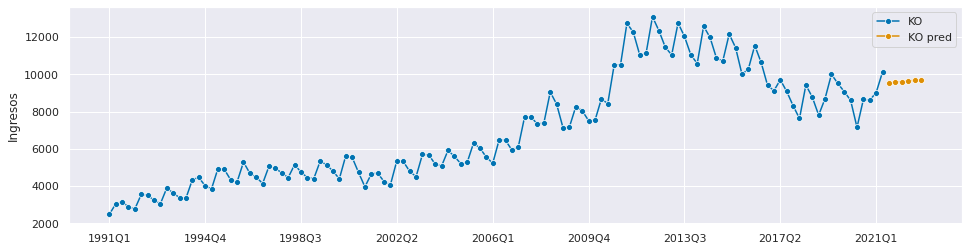

In [46]:
forecaster = ExponentialSmoothing(trend='mul',seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin componente estacional y sin tendencia<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6dc99310>)

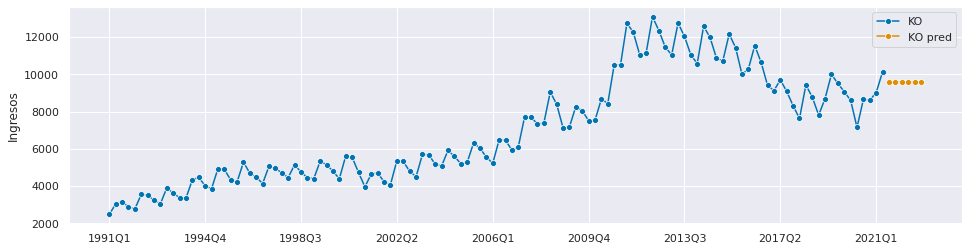

In [47]:
forecaster = ExponentialSmoothing(trend=None,seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia

    Componente estacional multiplicativo


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6dc3cb90>)

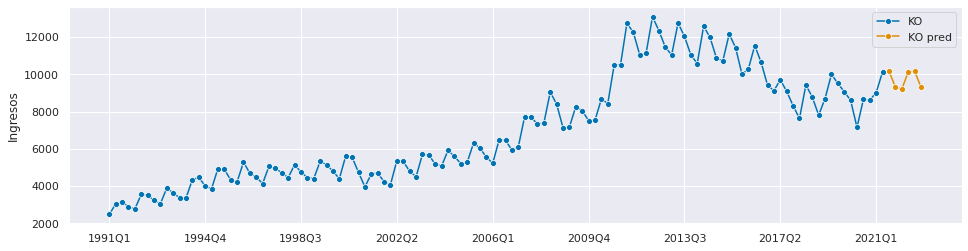

In [48]:
forecaster = ExponentialSmoothing(trend=None,seasonal="mul", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Estimemos el modelo de forma manual sin tendencia<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6dc7f910>)

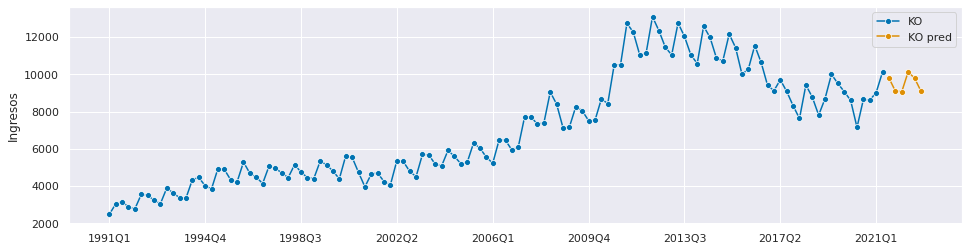

In [49]:
forecaster = ExponentialSmoothing(trend=None,seasonal="add", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["KO", "KO pred"])

<div class="redcuadro">

Comparar modelo con tendencia aditiva con y sin dumped<br>

Componente estacional aditivo<br><br>

</div>

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e6db40910>)

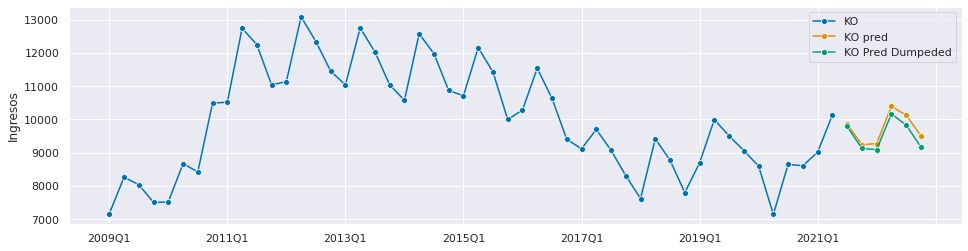

In [50]:
forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=False, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])